<a href="https://colab.research.google.com/github/muratali016/AI-Photo-Editor-UNet/blob/main/Background_changer_UNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Preprocess

In [ ]:
!unzip "/content/drive/MyDrive/fish_data(not separated to patches)_padded.zip" -d "/content/fish_data"

Görüntülenen çıkış son 5000 satıra kısaltıldı.
   creating: /content/fish_data/fish_data(not separated to patches)_padded/train/FITC/631/IMAGES/
  inflating: /content/fish_data/fish_data(not separated to patches)_padded/train/FITC/631/IMAGES/1.bmp  
   creating: /content/fish_data/fish_data(not separated to patches)_padded/train/FITC/631/MASKS/
  inflating: /content/fish_data/fish_data(not separated to patches)_padded/train/FITC/631/MASKS/1.bmp  
   creating: /content/fish_data/fish_data(not separated to patches)_padded/train/FITC/632/
   creating: /content/fish_data/fish_data(not separated to patches)_padded/train/FITC/632/IMAGES/
  inflating: /content/fish_data/fish_data(not separated to patches)_padded/train/FITC/632/IMAGES/1.bmp  
   creating: /content/fish_data/fish_data(not separated to patches)_padded/train/FITC/632/MASKS/
  inflating: /content/fish_data/fish_data(not separated to patches)_padded/train/FITC/632/MASKS/1.bmp  
   creating: /content/fish_data/fish_data(not separate

In [ ]:
%cp -av "/content/fish_data/fish_data(not separated to patches)_padded/train/DAPI" "/content/drive/MyDrive/DAPI_TRAINN/"

Görüntülenen çıkış son 5000 satıra kısaltıldı.
'/content/fish_data/fish_data(not separated to patches)_padded/train/DAPI/3061' -> '/content/drive/MyDrive/DAPI_TRAINN/DAPI/3061'
'/content/fish_data/fish_data(not separated to patches)_padded/train/DAPI/3061/IMAGES' -> '/content/drive/MyDrive/DAPI_TRAINN/DAPI/3061/IMAGES'
'/content/fish_data/fish_data(not separated to patches)_padded/train/DAPI/3061/IMAGES/1.bmp' -> '/content/drive/MyDrive/DAPI_TRAINN/DAPI/3061/IMAGES/1.bmp'
'/content/fish_data/fish_data(not separated to patches)_padded/train/DAPI/3061/MASKS' -> '/content/drive/MyDrive/DAPI_TRAINN/DAPI/3061/MASKS'
'/content/fish_data/fish_data(not separated to patches)_padded/train/DAPI/3061/MASKS/1.bmp' -> '/content/drive/MyDrive/DAPI_TRAINN/DAPI/3061/MASKS/1.bmp'
'/content/fish_data/fish_data(not separated to patches)_padded/train/DAPI/3062' -> '/content/drive/MyDrive/DAPI_TRAINN/DAPI/3062'
'/content/fish_data/fish_data(not separated to patches)_padded/train/DAPI/3062/IMAGES' -> '/conte

In [ ]:
import cv2
import ntpath
import numpy as np
from skimage.filters import threshold_otsu
import math
from PIL import Image
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch.nn as nn
import torch.optim as optim
import os

In [ ]:
img=cv2.imread("/content/fish_data/fish_data(not separated to patches)_padded/test/DAPI/1/MASKS/1.bmp")
img.shape

(1376, 1376, 3)

In [ ]:
img_path="/content/fish_data/fish_data(not separated to patches)_padded/test/DAPI"
def image_path_generator(img_folder):
  path_list=[]
  i=1
  for i in range(90):
    a=img_path+f"/{i}"
    path_list.append(a)
  return path_list       
test_images=image_path_generator(img_path) 
test_images.pop(0)
test_images.pop(39) 

'/content/fish_data/fish_data(not separated to patches)_padded/test/DAPI/40'

In [ ]:
file_ist=[]
for dir1 in os.listdir(img_path):
    for file in os.listdir(os.path.join(img_path, dir1)):       
         file_ist.append(file)
len(file_ist)   

176

In [ ]:
from google.colab.patches import cv2_imshow
img_folder="/content/fish_data/fish_data(not separated to patches)_padded/test/DAPI"
img_list=[]
square_images=[]
image_shapes=[]
for i in test_images:
  img_folder=i
  for dir1 in os.listdir(img_folder):   
    for file in os.listdir(os.path.join(img_folder, dir1)):
      image_path= os.path.join(img_folder, dir1,  file)          
      image=cv2.imread(image_path)
      img_list.append(image)
      if image.shape[0]==image.shape[1]:
        square_images.append(image)
      image_shapes.append(image.shape)  
      #image=cv2.resize(image,(224,224))
      #cv2_imshow(image)
   
len(square_images) ,len(img_list),image_shapes
unique_image_shapes = list(set(image_shapes)) 
unique_image_shapes # ------------------------------there is no different shapes in the test list----------------------------------

[(1376, 1376, 3)]

In [ ]:
len(square_images) ,len(img_list) #------------------------ All images are in the shape of square -------------------------------

(176, 176)

In [ ]:
# See how many images got train set
"""file_ist=[]
for dir1 in os.listdir(img_path_train):
    for file in os.listdir(os.path.join(img_path_train, dir1)):       
         file_ist.append(file)
len(file_ist) """         

6584

In [ ]:
img_path_train="/content/drive/MyDrive/DAPI_TRAINN/DAPI"
def image_path_generator(img_folder):
  path_list=[]
  i=1
  for i in range(6585):
    a=img_path_train+f"/{i}"
    path_list.append(a)
  return path_list       
train_images=image_path_generator(img_path_train) 
train_images.pop(0)
 
len(train_images)

6584

In [ ]:
from google.colab.patches import cv2_imshow
img_folder_train="/content/drive/MyDrive/DAPI"
img_list_train=[]
square_images_train=[]
for i in train_images:
  img_folder_train=i
  for dir1 in os.listdir(img_folder_train):   
    for file in os.listdir(os.path.join(img_folder_train, dir1)):
      image_path= os.path.join(img_folder_train, dir1,  file)          
      image=cv2.imread(image_path)
      img_list_train.append(image)
      if image.shape[0]==image.shape[1]:
        square_images_train.append(image)
      #image=cv2.resize(image,(224,224))
      #cv2_imshow(image)
unique_image_shapes = list(set(image_shapes)) 
unique_image_shapes   
 

In [ ]:
len(square_images_train) ,len(img_list_train) 

### Separating the mask and image dataset

In [ ]:
img_folder="/content/fish_data/fish_data(not separated to patches)_padded/test/DAPI"
Masks="/content/drive/MyDrive/fish_test_mask/"
y=0
for i in test_images:
  img_folder=i
  
  for dir1 in os.listdir(img_folder):
    
    if dir1=="MASKS":
      y=y+1 
      for file in os.listdir(os.path.join(img_folder, dir1)):
        image_path= os.path.join(img_folder, dir1,  file)          
        image=cv2.imread(image_path)
        #cv2_imshow(image)                   
        cv2.imwrite(Masks + "/" + f"{(y)}.bmp", image) 

In [ ]:
img_folder="/content/fish_data/fish_data(not separated to patches)_padded/test/DAPI"
raw_data="/content/drive/MyDrive/fish_test_raw/"#fish_test_mask
y=0
for i in test_images:
  img_folder=i
  
  for dir1 in os.listdir(img_folder):
    
    if dir1=="IMAGES":
      y=y+1 
      for file in os.listdir(os.path.join(img_folder, dir1)):
        image_path= os.path.join(img_folder, dir1,  file)          
        image=cv2.imread(image_path)
        #cv2_imshow(image)                   
        cv2.imwrite(raw_data + "/" + f"{(y)}.bmp", image) 

In [66]:
!unzip "/content/drive/MyDrive/portrait256.zip" -d "/content/drive/MyDrive/PORTRAIT_DATASET"

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: /content/drive/MyDrive/PORTRAIT_DATASET/portrait256/images/img/test_00236_crop.png  
  inflating: /content/drive/MyDrive/PORTRAIT_DATASET/portrait256/images/img/test_00236_cont.png  
  inflating: /content/drive/MyDrive/PORTRAIT_DATASET/portrait256/images/img/test_00236_brit.png  
  inflating: /content/drive/MyDrive/PORTRAIT_DATASET/portrait256/images/img/test_00236_blur.png  
  inflating: /content/drive/MyDrive/PORTRAIT_DATASET/portrait256/images/img/test_00236.png  
  inflating: /content/drive/MyDrive/PORTRAIT_DATASET/portrait256/images/img/test_00235_crop.png  
  inflating: /content/drive/MyDrive/PORTRAIT_DATASET/portrait256/images/img/test_00235_cont.png  
  inflating: /content/drive/MyDrive/PORTRAIT_DATASET/portrait256/images/img/test_00235_brit.png  
  inflating: /content/drive/MyDrive/PORTRAIT_DATASET/portrait256/images/img/test_00235_blur.png  
  inflating: /content/drive/MyDrive/PORTRAIT_DATASET/portrait256/images/img/

### UNet

In [67]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets,transforms
from tqdm import tqdm
import cv2
from torch.utils.data import Dataset,DataLoader
import torch.optim as optim
from PIL import Image
import torchvision.transforms as transforms
import os
import torch.nn.functional as F

In [84]:
# config
LEARNING_RATE = 0.001
SPLIT=0.1
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 4
EPOCHS = 10
NUM_WORKERS = 0
IMAGE_HEIGHT = 572
IMAGE_WIDTH = 572
PIN_MEMORY = True
DATAPATH = "..."
TRAIN_IMG_DIR ='/content/drive/MyDrive/PORTRAIT_DATASET/portrait256/images/img'
TRAIN_MASK_DIR =  '/content/drive/MyDrive/PORTRAIT_DATASET/portrait256/masks/msk'

In [69]:
from unet import UNet
UNet

unet.UNet

In [70]:
class Fish_Dataset(Dataset):
    def __init__(self,images,image_dir,mask_dir,transform=None,train=True):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.isTrain = train
        self.images = images
    def __len__(self):
        return len(self.images)
    def __getitem__(self,index):
        img_path = os.path.join(self.image_dir,self.images[index])
        mask_path = os.path.join(self.mask_dir,self.images[index])
        image = np.array(Image.open(img_path).convert("RGB"))
        mask = np.array(Image.open(mask_path).convert("L"),dtype=np.float32)
        mask[mask == 255.0] = 1.0
        
        if self.transform is not None:
            augmentations = self.transform(image=image,mask=mask)
            image = augmentations['image']
            mask = augmentations['mask']
            
        return {"image":image,"mask":mask}

In [85]:
images = os.listdir(TRAIN_IMG_DIR)
masks = os.listdir(TRAIN_MASK_DIR)

(256, 256, 3)


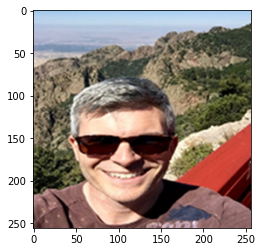

In [86]:
img = np.array(Image.open(TRAIN_IMG_DIR+"/"+images[800]).convert("RGB"))
plt.imshow(img,cmap="gray")
print(img.shape)

(256, 256)


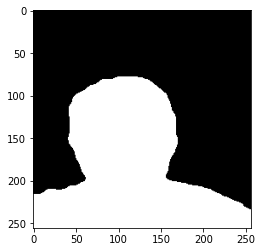

In [87]:
msk = np.array(Image.open(TRAIN_MASK_DIR+"/"+images[800]).convert("L"))
plt.imshow(msk,cmap="gray")
print(msk.shape)

In [88]:
def fit(model,dataloader,data,optimizer,criterion):
    print('-------------Training---------------')
    model.train()
    train_running_loss = 0.0
    counter=0
    
    # num of batches
    num_batches = int(len(data)/dataloader.batch_size)
    for i,data in tqdm(enumerate(dataloader),total=num_batches):
        counter+=1
        image,mask = data["image"].to(DEVICE),data["mask"].to(DEVICE)
        optimizer.zero_grad()
        outputs = model(image)
        outputs =outputs.squeeze(1)
        loss = criterion(outputs,mask)
        train_running_loss += loss.item()
        loss.backward()
        optimizer.step()
    train_loss = train_running_loss/counter
    return train_loss
def validate(model,dataloader,data,criterion):
    print("\n--------Validating---------\n")
    model.eval()
    valid_running_loss = 0.0
    counter = 0
    # number of batches
    num_batches = int(len(data)/dataloader.batch_size)
    with torch.no_grad():
        for i,data in tqdm(enumerate(dataloader),total=num_batches):
            counter+=1
            image,mask = data["image"].to(DEVICE),data["mask"].to(DEVICE)
            outputs = model(image)
            outputs =outputs.squeeze(1)
            loss = criterion(outputs,mask)
            valid_running_loss += loss.item()
    valid_loss = valid_running_loss/counter
    return valid_loss

In [89]:
import albumentations as A
from albumentations.pytorch import ToTensorV2 
train_transform = A.Compose([
    A.Resize(IMAGE_HEIGHT,IMAGE_WIDTH),
    A.Rotate(limit=35,p=1.0),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.1),
    A.Normalize(
        mean=[0.0,0.0,0.0],
        std = [1.0,1.0,1.0],
        max_pixel_value=255.0
    ),
    ToTensorV2()  
])
validation_transform = A.Compose([
     A.Resize(IMAGE_HEIGHT,IMAGE_WIDTH),
    A.Normalize(
        mean = [0.0,0.0,0.0],
        std = [1.0,1.0,1.0],
        max_pixel_value=255.0,
    ),
    ToTensorV2()
])

In [90]:
def train_test_split(images,splitSize):
    imageLen = len(images)
    val_len = int(splitSize*imageLen)
    train_len = imageLen - val_len
    train_images,val_images = images[:train_len],images[train_len:]
    return train_images,val_images

In [91]:
train_images_path,val_images_path = train_test_split(images,SPLIT)
train_data = Fish_Dataset(train_images_path,TRAIN_IMG_DIR,TRAIN_MASK_DIR,train_transform,True)
valid_data = Fish_Dataset(val_images_path,TRAIN_IMG_DIR,TRAIN_MASK_DIR,validation_transform,True)
train_dataloader = DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)
valid_dataloader = DataLoader(valid_data,batch_size=BATCH_SIZE,shuffle=False)

In [92]:
len(train_data),len(valid_data)

(29440, 3271)

In [93]:
torch.cuda.empty_cache()

In [ ]:
train_loss = []
val_loss =[]
model = UNet().to(DEVICE)
optimizer = optim.Adam(model.parameters(),lr=LEARNING_RATE)
criterion = nn.BCEWithLogitsLoss()
for epoch in range(EPOCHS):
    print(f"Epoch {epoch+1} of {EPOCHS}")
    train_epoch_loss = fit(model, train_dataloader, train_data,optimizer,criterion)
    val_epoch_loss = validate(model, valid_dataloader, valid_data, criterion)
    train_loss.append(train_epoch_loss)
    val_loss.append(val_epoch_loss)
    print(f"Train Loss: {train_epoch_loss:.4f}")
    print(f'Val Loss: {val_epoch_loss:.4f}')

plt.figure(figsize=(10, 7))
plt.plot(train_loss, color="orange", label='train loss')
plt.plot(val_loss, color="red", label='validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
torch.save({
    'epoch': EPOCHS,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': criterion,
}, "./drive/MyDrive/UNet_portrait_best.pth")



Epoch 1 of 10
-------------Training---------------


100%|██████████| 7360/7360 [1:29:44<00:00,  1.37it/s]



--------Validating---------



818it [04:25,  3.08it/s]


Train Loss: 0.4516
Val Loss: 0.2905
Epoch 2 of 10
-------------Training---------------


 35%|███▌      | 2586/7360 [31:28<57:53,  1.37it/s]

In [13]:
model = UNet().to(DEVICE)
optimizer = optim.Adam(model.parameters(),lr=LEARNING_RATE) 
checkpoint = torch.load("/content/drive/MyDrive/UNet_portrait2.pth")
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

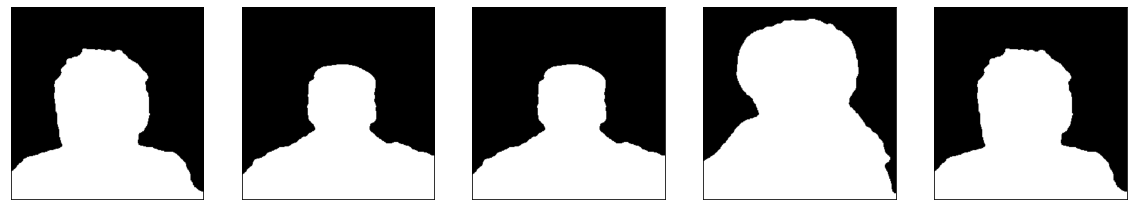

In [16]:
show_list=[1,2,3,4,5]

mask_list=[]
for i in range(len(show_list)):
  data = valid_data.__getitem__(i)
  data=data["mask"]
  mask_list.append(data)

plt.figure(figsize=(20,10))
columns = 5 
for i, image in enumerate(mask_list):
    plt.subplot(len(show_list) / columns + 1, columns, i + 1)
    plt.imshow(image,cmap="gray")
    plt.xticks([])
    plt.yticks([]) 

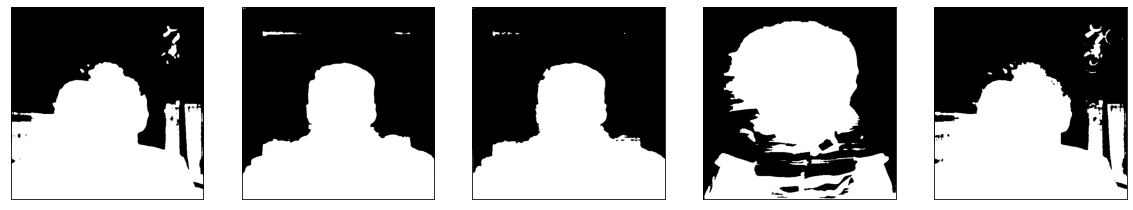

In [17]:
image_list=[]
for i in range(len(show_list)):
  data = valid_data.__getitem__(i)
  data=data["image"]
  image_list.append(data)

plt.figure(figsize=(20,10))
columns = 5 
for i, image in enumerate(image_list):
  plt.subplot(len(show_list) / columns + 1, columns, i + 1)
  img = image_list[i]
  img=img.squeeze(0).to(device="cuda")
  img=img[None,:]
  output = model(img)
  output = torch.squeeze(output)
  output[output>0.0] = 1.0
  output[output<=0.0]=0
   
  disp = output.detach().cpu()
  plt.imshow(disp,cmap="gray")
  plt.xticks([])
  plt.yticks([]) 

torch.Size([572, 572])


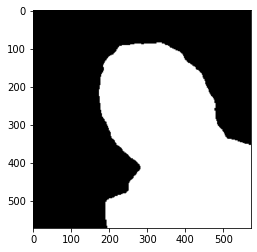

In [18]:
data = valid_data.__getitem__(36)
plt.imshow(data['mask'],cmap="gray")
print(data["mask"].shape)
#valid_data[0]
#print(train_data.__getitem__(0)['mask'].shape)

torch.Size([3, 572, 572])
tensor(1., device='cuda:0', grad_fn=<MaxBackward1>)


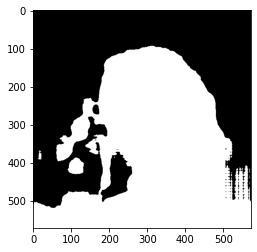

In [19]:
print(data['image'].shape)
img = data['image'].unsqueeze(0).to(device="cuda")
# model = UNet()
output = model(img)
output = torch.squeeze(output)
output[output>0.0] = 1.0
output[output<=0.0]=0
print(torch.max(output))
disp = output.detach().cpu()
plt.imshow(disp,cmap="gray")

In [20]:
# IOU SCORE
intersection = torch.logical_and(data["mask"],disp)
union = torch.logical_or(data["mask"],disp)
iou_score = torch.sum(intersection) / torch.sum(union)
iou_score

tensor(0.7736)

In [ ]:
iou_list=[]
for i in range(len(valid_data)):
  data_raw = valid_data.__getitem__(i)
  data=data_raw['mask']
  img = data_raw['image'].unsqueeze(0).to(device="cuda")
  output = model(img)
  output = torch.squeeze(output)
  output[output>0.0] = 1.0
  output[output<=0.0]=0
  disp = output.detach().cpu()
  intersection = torch.logical_and(disp,data)
  union = torch.logical_or(disp,data)
  iou_score = torch.sum(intersection) / torch.sum(union)
  iou_score*10
  iou_list.append(iou_score)
iou_list  

In [ ]:
iou_df=pd.DataFrame(iou_list,columns =['Scores'])
iou_df
iou_df.to_csv("/content/iou_scores.csv")

## OpenCV

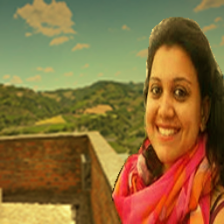

(224, 224, 3)


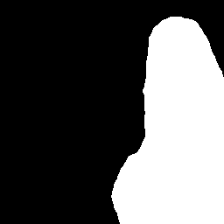

numpy.ndarray

In [59]:
from google.colab.patches import cv2_imshow
org_img=cv2.imread("/content/drive/MyDrive/DATASET_MAIN/img/warm_syn_sf156.png")
org_img=cv2.resize(org_img,(224,224))
cv2_imshow(org_img)
org_mask=cv2.imread("/content/drive/MyDrive/DATASET_MAIN/mask/warm_syn_sf156.png")
org_mask=cv2.resize(org_mask,(224,224))
print(org_mask.shape)
cv2_imshow(org_mask)
type(org_img)

cordinates:  [[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]


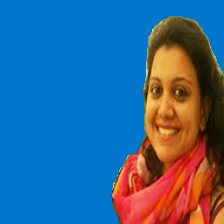

In [65]:
th = 10
black_pixels = np.where(
    (org_mask[:, :, 0] < th) & 
    (org_mask[:, :, 1] < th) & 
    (org_mask[:, :, 2] <th)
)
print("cordinates: ",org_mask[black_pixels])
back_img=cv2.imread("/content/drive/MyDrive/DATASET_MAIN/img/warm_syn_sf156.png")
back_img=cv2.resize(org_img,(224,224))
org_img[black_pixels] = [204, 119, 0]
cv2_imshow(org_img)


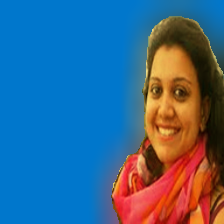

In [61]:
blur = cv2.blur(org_img,(50,50),0)
out = org_img.copy()
out[org_mask<th] = blur[org_mask<th]
cv2_imshow(out)

torch.Size([572, 572])
torch.Size([3, 572, 572])
modeldn önceli torch.Size([1, 3, 572, 572])
tensor(1., device='cuda:0', grad_fn=<MaxBackward1>)


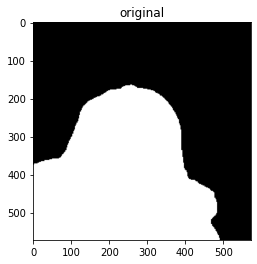

In [30]:
data = valid_data.__getitem__(65)
plt.title("original")
plt.imshow(data['mask'],cmap="gray");
print(data["mask"].shape)
#-----------------------------------------------
print(data['image'].shape)
img = data['image'].unsqueeze(0).to(device="cuda")
# model = UNet()
print("modeldn önceli",img.shape)
output = model(img)
output = torch.squeeze(output)
output[output>0.0] = 1.0
output[output<=0.0]=0
print(torch.max(output))
disp = output.detach().cpu()

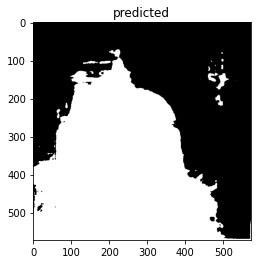

In [31]:
plt.title("predicted")
plt.imshow(disp,cmap="gray");

(256, 256, 3)
torch.Size([3, 572, 572])
torch.Size([1, 3, 572, 572])
tensor(1., device='cuda:0', grad_fn=<MaxBackward1>)


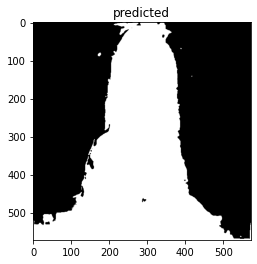

In [55]:
org_img=cv2.imread("/content/drive/MyDrive/DATASET_MAIN/img/warm_syn_sf165.png")
train_transform = A.Compose([
    A.Resize(IMAGE_HEIGHT,IMAGE_WIDTH),
    ToTensorV2()  
])
org_img_arr=np.asarray(org_img)
org_img_tesnor=train_transform(image=org_img_arr)
print(org_img.shape)
print(org_img_tesnor["image"].shape)
org_img_tesnor["image"]=org_img_tesnor["image"].unsqueeze(0)
print(org_img_tesnor["image"].shape)
output = model(org_img_tesnor["image"].float().cuda()).to(device="cuda")
output = torch.squeeze(output)
output[output>0.0] = 1.0
output[output<=0.0]=0
print(torch.max(output))
disp = output.detach().cpu()
plt.title("predicted")
plt.imshow(disp,cmap="gray");

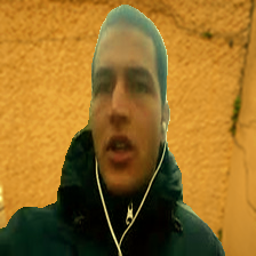

In [56]:
cv2_imshow(org_img)